# Manipulating text at scale

This section introduces you to regular expressions for manipulating text and how to apply the same procedure to several files.

Ideally, Python should enable you to manipulate text at scale, that is, to apply the same procedure to ten, hundred or thousand text files *with the same effort*.

To do so, we must be able to define more flexible patterns than the fixed strings that we used previously with the `replace()` method, while opening and closing files automatically.

This capability is provided by Python modules for *regular expressions* and *file handling*.

After reading this section, you should know:

 - how to manipulate multiple text files using Python
 - how to define simple patterns using *regular expressions*
 - how to save the results

## Regular expressions

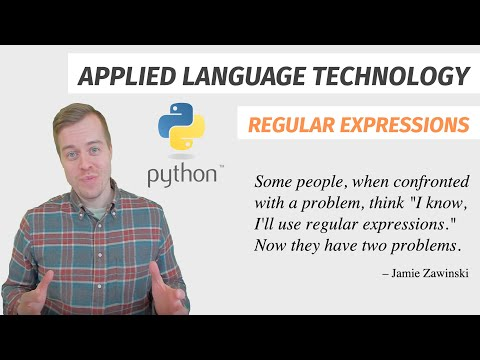

In [8]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('seCpHdTA-vs', height=350, width=600)

[Regular expressions](https://en.wikipedia.org/wiki/Regular_expression) are a "language" that allows defining *search patterns*.

These patterns can be used to find or to find and replace patterns in Python string objects.

As opposed to fixed strings, regular expressions allow defining *wildcard characters* that stand in for any character, *quantifiers* that match sequences of repeated characters, and much more.

Python allows using regular expressions through its `re` module.

We can activate this module using the `import` command.

In [9]:
import re

Let's begin by loading the text file, reading its contents, assigning the last 2000 characters to the variable `extract` and printing out the result.

In [10]:
# Define a path to the file, open the file for (r)eading using utf-8 encoding
with open(file='data/WP_1990-08-10-25A.txt', mode='r', encoding='utf-8') as file:

    # Read the file contents using the .read() method
    text = file.read()

# Get the *last* 2000 characters – note the minus sign before the number
extract = text[-2000:]

# Print the result
print(extract)

 guardian of democracy .., also works as a deterrent to ter;;, rorists.
   If the United States and all its; might wasn't viewed as looking- out for smaller countries’ inter- ; ests, Rogers said, "things could get completely out of hand.;- Anybody could do anything/; Terrorism would spread like a cancer.”	,
   Poor people may be the first'-'* to feel repercussions from Iraq's invasion of Kuwait. Al->." ready, the price of a tankful of gasoline has increased a dollar— or two at many pumps in the region.
   "This is going to hurt the. poor man and the U.S. car tor.... dustry,” Rogers predicted.
   “Even if they ration gas, ;lt won’t matter to rich people*”...;, said Belk, from the VA nursing-,:.’ home. “They will buy it on the black market. But if you don't,7 have much money to begin with;-’; it’s going to make a difference/*—.
   Gerald Dunn, a federal gov*” - eminent employee from Alex-* 1 andria, said that he believed'"" that most middle- and upper-in-"“ come families wouldn’t even no

As you can see, the text has a lot of errors from optical character recognition, mainly in the form of sequences such as `....` and `,,,,`.

Let's compile our first regular expression that searches for sequences of *two or more* full stops.

This is done using the `compile()` function from the `re` module.

The `compile()` function takes a string as an input. 

Note that we attach the prefix `r` to the string. This tells Python to store the string in 'raw' format. This means that the string is stored as it appears.

In [11]:
# Compile a regular expression and assign it to the variable 'stops'
stops = re.compile(r'\.{2,}')

# Let's check the type of the regular expression!
type(stops)

re.Pattern

Let's unpack this regular expression a bit.

1. The regular expression is defined using a Python string, as indicated by the single quotation marks `'  '`.

2. We need a backslash `\` in front of our full stop `.`. The backslash tells Python that we are really referring to a full stop, because regular expressions use a full stop as a *wildcard* character that can stand in for *any character*.

3. The curly brackets `{ }` instruct the regular expression to search for instances of the previous item `\.` (our actual full stop) that occur two or more times (`2,`). This (hopefully) preserves true uses of a full stop!

In plain language, we tell the regular expression to search for *occurrences of two or more full stops*. 

To apply this regular expression to some text, we will use the `sub()` method of our newly-defined regular expression object `stops`.

The `sub()` method takes two arguments:

1. `repl`: A string containing a string that is used to *replace* possible matches.
2. `string`: A string object to be searched for matches.

The method returns the modified string object.

Let's apply our regular expression to the string stored under the variable `extract`.

In [12]:
# Apply the regular expression to the text under 'extract' and save the output
# to the same variable, essentially overwriting the old text.
extract = stops.sub(repl='', string=extract)

# Print the text to examine the result
print(extract)

 guardian of democracy , also works as a deterrent to ter;;, rorists.
   If the United States and all its; might wasn't viewed as looking- out for smaller countries’ inter- ; ests, Rogers said, "things could get completely out of hand.;- Anybody could do anything/; Terrorism would spread like a cancer.”	,
   Poor people may be the first'-'* to feel repercussions from Iraq's invasion of Kuwait. Al->." ready, the price of a tankful of gasoline has increased a dollar— or two at many pumps in the region.
   "This is going to hurt the. poor man and the U.S. car tor dustry,” Rogers predicted.
   “Even if they ration gas, ;lt won’t matter to rich people*”;, said Belk, from the VA nursing-,:.’ home. “They will buy it on the black market. But if you don't,7 have much money to begin with;-’; it’s going to make a difference/*—.
   Gerald Dunn, a federal gov*” - eminent employee from Alex-* 1 andria, said that he believed'"" that most middle- and upper-in-"“ come families wouldn’t even no-.; — tic

As you can see, the sequences of full stops are gone.

We can make our regular expression even more powerful by adding alternatives.

Let's compile another regular expression and store it under the variable `punct`.

In [13]:
# Compile a regular expression and assign it to the variable 'punct'
punct = re.compile(r'(\.|,){2,}')

What's new here are the parentheses `( )` and the vertical bar `|` between them, which separates our actual full stop `\.` and the comma `,`.

The characters surrounded by parentheses and separated by a vertical bar mark *alternatives*.

In plain English, we tell the regular expression to search for *occurrences of two or more full stops or commas*.

Let's apply our new pattern to the text under `extract`.

To ensure the pattern works as intended, let's retrieve the original text from the `text` variable and assign it to the variable `extract` to overwrite our previous edits.

In [14]:
# "Reset" the extract variable by taking the last 2000 characters of the original string
extract = text[-2000:]

# Apply the regular expression
extract = punct.sub(repl='', string=extract)

# Print out the result
print(extract)

 guardian of democracy  also works as a deterrent to ter;;, rorists.
   If the United States and all its; might wasn't viewed as looking- out for smaller countries’ inter- ; ests, Rogers said, "things could get completely out of hand.;- Anybody could do anything/; Terrorism would spread like a cancer.”	,
   Poor people may be the first'-'* to feel repercussions from Iraq's invasion of Kuwait. Al->." ready, the price of a tankful of gasoline has increased a dollar— or two at many pumps in the region.
   "This is going to hurt the. poor man and the U.S. car tor dustry,” Rogers predicted.
   “Even if they ration gas, ;lt won’t matter to rich people*”;, said Belk, from the VA nursing-,:.’ home. “They will buy it on the black market. But if you don't,7 have much money to begin with;-’; it’s going to make a difference/*—.
   Gerald Dunn, a federal gov*” - eminent employee from Alex-* 1 andria, said that he believed'"" that most middle- and upper-in-"“ come families wouldn’t even no-.; — tice

Success! The sequences of full stops and commas can be removed using a single regular expression.

### Quick exercise

Use `re.compile()` to compile a regular expression that matches `”`, `""` and `’’` and store the result under the variable `quotes`.

Find matching sequences in `extract` and replace them with `"`.

You will need parentheses `( )` and vertical bars `|` to define the alternatives.

In [15]:
### Enter your code below this line and run the cell (press Shift and Enter at the same time)
quotes=re.compile(r'\”|""|’’')
extract=quotes.sub(repl='"', string=extract)
extract                  

' guardian of democracy  also works as a deterrent to ter;;, rorists.\n   If the United States and all its; might wasn\'t viewed as looking- out for smaller countries’ inter- ; ests, Rogers said, "things could get completely out of hand.;- Anybody could do anything/; Terrorism would spread like a cancer."\t,\n   Poor people may be the first\'-\'* to feel repercussions from Iraq\'s invasion of Kuwait. Al->." ready, the price of a tankful of gasoline has increased a dollar— or two at many pumps in the region.\n   "This is going to hurt the. poor man and the U.S. car tor dustry," Rogers predicted.\n   “Even if they ration gas, ;lt won’t matter to rich people*";, said Belk, from the VA nursing-,:.’ home. “They will buy it on the black market. But if you don\'t,7 have much money to begin with;-’; it’s going to make a difference/*—.\n   Gerald Dunn, a federal gov*" - eminent employee from Alex-* 1 andria, said that he believed\'" that most middle- and upper-in-"“ come families wouldn’t even 

The more irregular sequences resulting from optical character recognition errors in `extract`, such as `'-'*`, `->."`, `/*—.`, `-"“` and `'"''.` are much harder to capture.

Capturing these patterns would require defining more complex regular expressions, which are harder to write. Their complexity is, however, what makes regular expressions so powerful, but at the same time, learning how to use them takes time and patience.

It is therefore a good idea to use a service such as [regex101.com](https://www.regex101.com) to learn the basics of regular expressions.

In practice, coming up with regular expressions that cover as many matches as possible is particularly hard. 

Capturing most of the errors – and perhaps distributing the manipulations over a series of steps in a pipeline – can already help prepare the text for further processing or analysis.

However, keep in mind that in order to identify patterns for manipulating text programmatically, you should always look at more than one text in your corpus.

## Processing multiple files

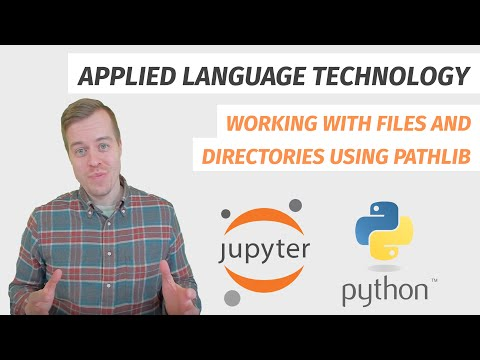

In [16]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('IwhhNfDYvlI', height=350, width=600)

Many corpora contain texts in multiple files. 

To make manipulating high volumes of text as efficient as possible, we must open the files, read their contents, perform the requested operations and close them *programmatically*.

This procedure is made fairly simple using the `Path` class from Python's `pathlib` module.

Let's import the class first. Using the command `from` with `import` allows us to import only a part of the `pathlib` module, namely the `Path` class. This is useful if you only need some feature contained in a Python module or library.

In [17]:
from pathlib import Path

The `Path` class encodes information about *paths* in a *directory structure*.

What's particularly great about the Path class is that it can automatically infer what kinds of paths your operating system uses. 

Here the problem is that operating systems such as Windows, Linux and Mac OS X have different file system paths.

Using the `Path` class allows us to avoid a lot of trouble, particularly if we want our code to run on different operating systems.

Our repository contains a directory named `data`, which contains the text files that we have been working with recently.

Let's initialise a Path *object* that points towards this directory by providing a string with the directory name to the Path *class*. We assign the object to the variable `corpus_dir`.

In [18]:
# Create a Path object that points towards the directory 'data' and assign
# the object to the variable 'corpus_dir'
corpus_dir = Path('data')

The Path object stored under `corpus_dir` has various useful methods and attributes.

We can, for instance, easily check if the path is valid using the `exists()` method.

This returns a Boolean value, that is, either *True* or *False*.

In [19]:
# Use the exists() method to check if the path is valid
corpus_dir.exists()

True

We can also check if the path is a directory using the `is_dir()` method.

In [20]:
# Use the exists() method to check if the path points to a directory
corpus_dir.is_dir()

True

Let's make sure the path does not point towards a file using the `is_file()` method.

In [21]:
# Use the exists() method to check if the path points to a file
corpus_dir.is_file()

False

Now that we know that the path points toward a directory, we can use the `glob()` method to collect all text files in the directory.

`glob` stands for [*global*](https://en.wikipedia.org/wiki/Glob_(programming)), and was first implemented as a program for matching filenames and paths using wildcards.

The `glob()` method requires one argument, `pattern`, which takes a string as input. This string defines the kinds of files to be collected. The asterisk symbol `*` acts as a wildcard, which can refer to *any sequence of characters* preceding the sequence `.txt`.

The file identifier `.txt` is a commonly-used suffix for plain text files.

We also instruct Python to *cast* the result into a list using the `list()` function, so we can easily loop over the files in the list.

Finally, we store the result under the variable `files` and call the result.

In [22]:
# Get all files with the suffix .txt in the directory 'corpus_dir' and cast the result into a list
files = list(corpus_dir.glob(pattern='*.txt'))

# Call the result
files

[PosixPath('data/NYT_1991-01-16-A15.txt'),
 PosixPath('data/WP_1990-08-10-25A.txt'),
 PosixPath('data/WP_1991-01-17-A1B.txt')]

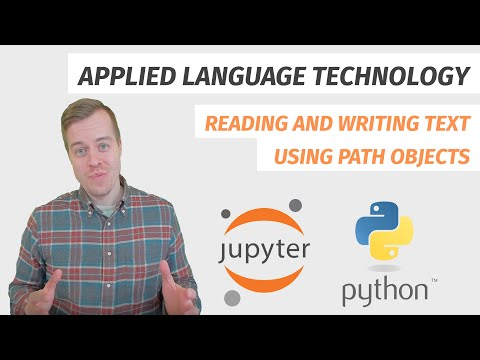

In [23]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('rM1X6u9-o8A', height=350, width=600)

We now have a list of three Path objects that point towards three text files!

This allows us to loop over the files using a `for` loop and manipulate text in each file.

In the cell below, we iterate over each file defined in the Path object, read and modify its contents, and write them to a new file.

In [28]:
# Loop over the list of Path objects under 'files'. Refer to the individual files using
# the variable 'file'.
#处理文件夹里的三个txt文件
for file in files:
    
    # Use the read_text() method of a Path object to read the file contents. Provide 
    # the value 'utf-8' to the 'encoding' argument to declare the file encoding.
    # Store the result under the variable 'text'.
    #读取为可编辑形式
    text = file.read_text(encoding='utf-8')
    
    # Apply the regular expression we defined above to remove excessive punctuation 
    # from the text. Store the result under the variable 'mod_text'
    #处理纯文本，命名为mod_text
    mod_text = punct.sub('', text)
    
    # Define a new filename which has the prefix 'mod_' by creating a new string. 
    # The Path object contains the filename as a string under the attribute 'name'. 
    # Combine the two strings using the '+' expression.
    #新建文件名，文件内容为空
    new_filename = 'mod_' + file.name
    
    # Define a new Path object that points towards the new file. The Path object 
    # will automatically join the directory and filename for us.
    #新为新文件新增路径
    new_path = Path('data', new_filename)
    
    # Print a status message using string formatting. By adding the prefix 'f' to 
    # a string, we can use curly brackets {} to insert a variable within the string. 
    # Here we add the current file path to the string for printing.
    print(f'Writing modified text to {new_path}')
    
    # Use the write_text() method to write the modified text under 'mod_text' to 
    # the file using UTF-8 encoding.   
    #在新路径中写入处理好的纯文本
    new_path.write_text(mod_text, encoding='utf-8')

Writing modified text to data/mod_NYT_1991-01-16-A15.txt
Writing modified text to data/mod_WP_1990-08-10-25A.txt
Writing modified text to data/mod_WP_1991-01-17-A1B.txt


As you can see from the code block above, Path objects provide two convenient methods for working with text files: `read_text()` and `write_text()`.

These methods can be used to read and write text from files without using the `with` statement, which was introduced in the previous [section](01_basic_text_processing.ipynb). Just as using the `with` statement, the file that the Path points to is closed after the text has been read.

If you now take a look at the directory [data](data), you should now see three files whose names have the prefix `mod_`. These are the files we just modified and wrote to disk.

To keep the data directory clean, run the following cell to delete the modified files.

Adding the exclamation mark `!` to the beginning of a code cell tells Jupyter that this is a command to the underlying command line interface, which can be used to manipulate the file system.

In this case, we run the command `rm` to delete all files in the directory `data`, whose filename begins with the characters `mod`.

In [29]:
!rm data/mod*

This should have given you an idea of the some more powerful methods for manipulating text available in Python, such as regular expressions, and how to apply them to multiple files at the same time.

The [following section](03_basic_nlp.ipynb) will teach you how to apply basic natural language processing techniques to texts.